In [19]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [20]:
df_raw

,model,dataset,pruning,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
0,MLP,MNIST,-,S/W,-,-,-,-,-,-,-,-,-,-,-,1,-,97.790001,0.000000
1,Resnet18,CIFAR10,-,S/W,-,-,-,-,-,-,-,-,-,-,-,1,-,93.070000,0.000000
2,Resnet18,CIFAR10,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,1,92.808998,0.063849
3,Resnet18,CIFAR10,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,10,92.717995,0.068928
4,Resnet18,CIFAR10,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,100,90.811996,0.101521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,MLP,MNIST,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,100000000,76.630997,1.352301
1719,MLP,MNIST,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1000000000,72.294998,1.354058
1720,MLP,MNIST,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,10000000000,66.201004,1.318243
1721,MLP,MNIST,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1000000000000,54.749001,1.237879


In [21]:
pivot_index = list(df_raw.columns[0:16]) # inf_time 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')

In [22]:
pivot_index

['model',
 'dataset',
 'pruning',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'Gmax',
 'Gmin',
 'G_ratio']

In [150]:
df_raw['drift_model'].unique()

array(['-', 'default', 0.1, 0.05, 0.01, 'log', 'GST225', 'linear'],
      dtype=object)

In [23]:
df = df_raw.copy()

In [24]:
df = df[df['Gmax']=='default']
# df = df[df['drift_model'] == 'log']
# df = df[df['inf_time'] == 1]
df = df[df['pgm_noise_scale'] == 1]

In [25]:
df

,model,dataset,pruning,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
1328,MLP,MNIST,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,GST225,default,default,25,10,1,94.768005,0.736942
1329,MLP,MNIST,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,GST225,default,default,25,10,10,94.608009,0.621001
1330,MLP,MNIST,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,GST225,default,default,25,10,100,94.257004,0.739776
1331,MLP,MNIST,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,GST225,default,default,25,10,1000,93.721001,0.475359
1332,MLP,MNIST,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,GST225,default,default,25,10,3600,92.606003,0.902198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,MLP,MNIST,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,100000000,76.630997,1.352301
1719,MLP,MNIST,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1000000000,72.294998,1.354058
1720,MLP,MNIST,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,10000000000,66.201004,1.318243
1721,MLP,MNIST,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1000000000000,54.749001,1.237879


In [175]:
df_resnet = df_new[df_new['model'] == 'Resnet18']
df_mlp = df_new[df_new['model'] == 'MLP']

In [176]:
df_resnet

,model,dataset,device,IOparameter,GDC,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std,Unnamed: 16,Unnamed: 17,Unnamed: 18
275,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,5,200,10,1,91.641998,0.188786,NaN,NaN,NaN
288,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,100,5,20,10,1,90.695999,0.511928,NaN,NaN,NaN
301,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,25,5,5,10,1,85.943008,1.374417,NaN,NaN,NaN
314,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,10,5,2,10,1,37.375999,3.229496,NaN,NaN,NaN
327,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,10,100,10,1,91.365005,0.361394,NaN,NaN,NaN
340,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,20,50,10,1,90.059006,0.521249,NaN,NaN,NaN
353,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,50,20,10,1,89.968994,0.751154,NaN,NaN,NaN
366,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,100,10,10,1,89.233009,0.871449,NaN,NaN,NaN


In [196]:
df_resnet = df_resnet.sort_values(by='G_ratio', ascending=True)
df_resnet = df_resnet.drop(df_resnet.index[3], axis=0)
df_resnet

,model,dataset,device,IOparameter,GDC,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std,Unnamed: 16,Unnamed: 17,Unnamed: 18
314,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,10,5,2,10,1,37.375999,3.229496,NaN,NaN,NaN
301,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,25,5,5,10,1,85.943008,1.374417,NaN,NaN,NaN
366,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,100,10,10,1,89.233009,0.871449,NaN,NaN,NaN
353,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,50,20,10,1,89.968994,0.751154,NaN,NaN,NaN
340,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,20,50,10,1,90.059006,0.521249,NaN,NaN,NaN
327,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,10,100,10,1,91.365005,0.361394,NaN,NaN,NaN
275,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,5,200,10,1,91.641998,0.188786,NaN,NaN,NaN


In [177]:
df_mlp

,model,dataset,device,IOparameter,GDC,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std,Unnamed: 16,Unnamed: 17,Unnamed: 18
1055,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,5,200,10,1,94.086006,0.629131,NaN,NaN,NaN
1068,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,100,5,20,10,1,91.163002,1.804475,NaN,NaN,NaN
1081,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,25,5,5,10,1,89.461998,2.442034,NaN,NaN,NaN
1094,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,10,5,2,10,1,57.979004,5.608686,NaN,NaN,NaN
1107,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,10,100,10,1,93.228996,0.761730,NaN,NaN,NaN
1120,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,20,50,10,1,92.612000,1.365429,NaN,NaN,NaN
1133,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,50,20,10,1,91.725006,1.269220,NaN,NaN,NaN
1146,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,100,10,10,1,91.334999,1.785039,NaN,NaN,NaN


In [182]:
df_mlp = df_mlp.sort_values(by='G_ratio', ascending=True)
df_mlp

,model,dataset,device,IOparameter,GDC,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std,Unnamed: 16,Unnamed: 17,Unnamed: 18
1094,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,10,5,2,10,1,57.979004,5.608686,NaN,NaN,NaN
1081,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,25,5,5,10,1,89.461998,2.442034,NaN,NaN,NaN
1146,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,100,10,10,1,91.334999,1.785039,NaN,NaN,NaN
1068,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,100,5,20,10,1,91.163002,1.804475,NaN,NaN,NaN
1133,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,50,20,10,1,91.725006,1.269220,NaN,NaN,NaN
1120,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,20,50,10,1,92.612000,1.365429,NaN,NaN,NaN
1107,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,10,100,10,1,93.228996,0.761730,NaN,NaN,NaN
1055,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,5,200,10,1,94.086006,0.629131,NaN,NaN,NaN


In [193]:
df_mlp = df_mlp.drop(df_mlp.index[3], axis=0)
df_mlp

,model,dataset,device,IOparameter,GDC,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std,Unnamed: 16,Unnamed: 17,Unnamed: 18
1094,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,10,5,2,10,1,57.979004,5.608686,NaN,NaN,NaN
1081,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,25,5,5,10,1,89.461998,2.442034,NaN,NaN,NaN
1146,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,100,10,10,1,91.334999,1.785039,NaN,NaN,NaN
1133,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,50,20,10,1,91.725006,1.269220,NaN,NaN,NaN
1120,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,20,50,10,1,92.612000,1.365429,NaN,NaN,NaN
1107,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,10,100,10,1,93.228996,0.761730,NaN,NaN,NaN
1055,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,5,200,10,1,94.086006,0.629131,NaN,NaN,NaN


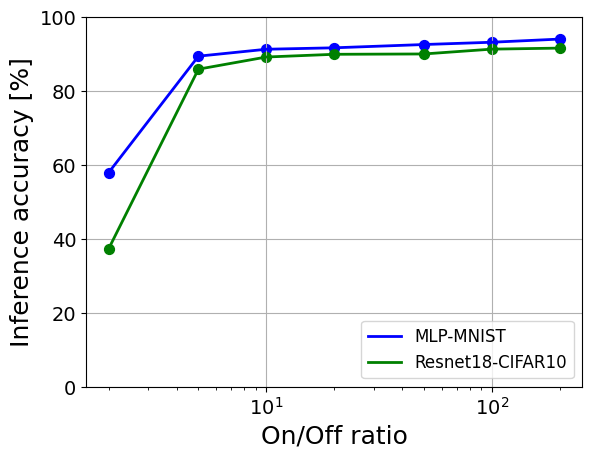

In [199]:
import matplotlib.pyplot as plt

x = df_mlp['G_ratio']
y = df_mlp['accuracy']
y_r = df_resnet['accuracy']

plt.grid(True)

plt.plot(x,y, label = 'MLP-MNIST', linewidth=2, color='b')
plt.scatter(x, y, marker='.', s=200, color='b')

plt.plot(x,y_r, label = 'Resnet18-CIFAR10', linewidth=2, color='g')
plt.scatter(x, y_r, marker='.', s=200, color='g')


plt.legend(fontsize=12, loc='lower right', bbox_to_anchor=(1.0, 0.0))
plt.xlabel('On/Off ratio', fontsize=18)
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0,100)
# plt.xlim(1,100000000)
plt.xscale('log')
plt.show()

In [113]:
df_pivot = df_new.pivot_table(index=pivot_index, columns='drift_model', values='accuracy', aggfunc='mean')
df_pivot

drift_model                                                                                                                                    0.01  \
model    dataset device            IOparameter GDC pgm_noise_scale read_noise_scale drift_scale Gmax    Gmin    G_ratio inf_time                      
MLP      MNIST   PCMPresetUnitCell non-ideal   off 0               0                1           default default 25      1                 95.643990   
                                                                                                                        10                95.548996   
                                                                                                                        100               95.430000   
                                                                                                                        1000              95.108994   
                                                                                                                        3600              94.865997   
                                                                                                                        10000             94.732002   
                                                                                                                        86400             94.272995   
                                                                                                                        10000000          92.901009   
                                                                                                                        100000000         91.888000   
                                                                                                                        1000000000        90.908997   
                                                                                                                        10000000000       89.963997   
                                                                                                                        1000000000000     87.598999   
                                                                                                                        1000000000000000  84.112991   
                                                   1               1                1           default default 25      1                       NaN   
                                                                                                                        10                      NaN   
                                                                                                                        100                     NaN   
                                                                                                                        1000                    NaN   
                                                                                                                        3600                    NaN   
                                                                                                                        10000                   NaN   
                                                                                                                        86400                   NaN   
                                                                                                                        10000000                NaN   
                                                                                                                        100000000               NaN   
                                                                                                                        1000000000              NaN   
                                                                                                                        10000000000             NaN   
                                                                          

In [114]:
df_pivot.reset_index(inplace=True) # index to columns

In [115]:
df_pivot.to_csv('./pivot.csv', index=False)

In [116]:
df_new = df_pivot[df_pivot['pgm_noise_scale']==0]

In [117]:
df_new = df_new[df_new['model']=='MLP']
df_new

drift_model,model,dataset,device,IOparameter,GDC,pgm_noise_scale,read_noise_scale,drift_scale,Gmax,Gmin,G_ratio,inf_time,0.01,0.05,0.1,GST225,default,linear,log
0,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,1,95.643990,95.556007,95.513008,95.684998,NaN,95.526993,95.590996
1,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,10,95.548996,95.336006,95.182007,95.476006,NaN,95.320999,95.439995
2,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,100,95.430000,94.619003,93.414001,95.355011,NaN,94.091995,94.945999
3,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,1000,95.108994,92.854996,88.595001,94.913994,NaN,90.375000,93.731995
4,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,3600,94.865997,91.641991,84.136002,94.469002,NaN,87.279999,92.886002
5,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,10000,94.732002,90.162003,79.757996,94.076004,NaN,84.160995,92.033989
6,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,86400,94.272995,86.493996,67.764999,92.826996,NaN,75.824005,89.283005
7,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,10000000,92.901009,75.680008,34.562000,89.343002,NaN,49.821999,81.653999
8,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,100000000,91.888000,69.329002,23.042002,86.794998,NaN,36.372997,77.156998
9,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,0,0,1,default,default,25,1000000000,90.908997,62.160999,15.699000,84.293007,NaN,26.205999,72.051003


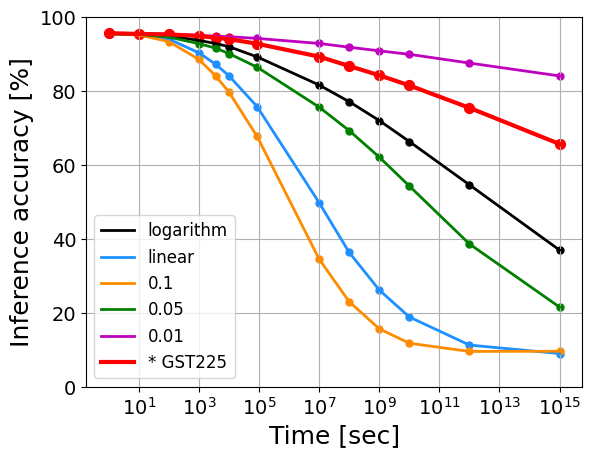

In [145]:
import matplotlib.pyplot as plt

x = df_new['inf_time']

plt.grid(True)
plt.plot(x,df_new['log'], label = 'logarithm', linewidth=2, color='k')
plt.scatter(x, df_new['log'], marker='.', s=100, color='k')

plt.plot(x,df_new['linear'], label = 'linear', linewidth=2, color='dodgerblue')
plt.scatter(x, df_new['linear'], marker='.',  s=100, color='dodgerblue')

plt.plot(x,df_new[0.1], label = '0.1', linewidth=2, color='darkorange')
plt.scatter(x, df_new[0.1], marker='.',  s=100, color='darkorange')

plt.plot(x,df_new[0.05], label = '0.05', linewidth=2, color='g')
plt.scatter(x, df_new[0.05], marker='.',  s=100, color='g')

plt.plot(x,df_new[0.01], label = '0.01', linewidth=2, color='m')
plt.scatter(x, df_new[0.01], marker='.',  s=100, color='m')

plt.plot(x,df_new['GST225'], label = '* GST225', linewidth=3, color='r')
plt.scatter(x, df_new['GST225'], marker='.',  s=200, color='r')

plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]', fontsize=18)
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0,100)
# plt.xlim(1,100000000)
plt.xscale('log')
plt.show()